In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('sdn_dataset_2022.csv',sep=';')

In [3]:
df.shape

(5988, 41)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5988 entries, 0 to 5987
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   forward_pl_mean    5985 non-null   float64
 1   forward_piat_mean  5985 non-null   float64
 2   forward_pps_mean   5985 non-null   float64
 3   forward_bps_mean   5985 non-null   float64
 4   forward_pl_var     5985 non-null   float64
 5   forward_piat_var   5985 non-null   float64
 6   forward_pps_var    5985 non-null   float64
 7   forward_bps_var    5985 non-null   float64
 8   forward_pl_q1      5985 non-null   float64
 9   forward_pl_q3      5985 non-null   float64
 10  forward_piat_q1    5985 non-null   float64
 11  forward_piat_q3    5985 non-null   float64
 12  forward_pl_max     5985 non-null   float64
 13  forward_pl_min     5985 non-null   float64
 14  forward_piat_max   5985 non-null   float64
 15  forward_piat_min   5985 non-null   float64
 16  forward_pps_max    5985 

In [5]:
df.columns

Index(['forward_pl_mean', 'forward_piat_mean', 'forward_pps_mean',
       'forward_bps_mean', 'forward_pl_var', 'forward_piat_var',
       'forward_pps_var', 'forward_bps_var', 'forward_pl_q1', 'forward_pl_q3',
       'forward_piat_q1', 'forward_piat_q3', 'forward_pl_max',
       'forward_pl_min', 'forward_piat_max', 'forward_piat_min',
       'forward_pps_max', 'forward_pps_min', 'forward_bps_max',
       'forward_bps_min', 'reverse_pl_mean', 'reverse_piat_mean',
       'reverse_pps_mean', 'reverse_bps_mean', 'reverse_pl_var',
       'reverse_piat_var', 'reverse_pps_var', 'reverse_bps_var',
       'reverse_pl_q1', 'reverse_pl_q3', 'reverse_piat_q1', 'reverse_piat_q3',
       'reverse_pl_max', 'reverse_pl_min', 'reverse_piat_max',
       'reverse_piat_min', 'reverse_pps_max', 'reverse_pps_min',
       'reverse_bps_max', 'reverse_bps_min', 'category'],
      dtype='object')

In [6]:
df['category'].value_counts()

category
FILE-SKYPE          720
AUDIO-HANGOUTS      551
EMAIL               495
VIDEO-HANGOUTS      488
AUDIO-SKYPE         482
AUDIO-FACEBOOK      388
FILE-FTPS           375
VIDEO-SKYPE         325
AUDIO-VOIPBUSTER    316
STR-SPOTIFY         310
FILE-SFTP-DOWN      282
CHAT-GMAIL          267
CHAT-FACEBOOK       220
STR-YOUTUBE         197
STR-NETFLIX         162
CHAT-ICQ            136
STR-VIMEO           133
CHAT-HANGOUTS       129
--UNKNOWN--           9
Name: count, dtype: int64

In [7]:
import numpy as np

category_mapping = {
    'FILE': ['FILE-SKYPE', 'FILE-SFTP-DOWN', 'FILE-FTPS'],
    'STR': ['STR-SPOTIFY', 'STR-VIMEO', 'STR-YOUTUBE'],
    'CHAT': ['CHAT-HANGOUTS', 'CHAT-FACEBOOK', 'CHAT-GMAIL', 'CHAT-ICQ'],
    'VIDEO': ['VIDEO-SKYPE', 'VIDEO-HANGOUTS'],
    'AUDIO': ['AUDIO-VOIPBUSTER', 'AUDIO-SKYPE', 'AUDIO-HANGOUTS', 'AUDIO-FACEBOOK'],
    'EMAIL': ['EMAIL']
}

def map_category_to_class(category):
    for class_name, categories in category_mapping.items():
        if category in categories:
            return class_name
    return "Other"  

df['class'] = df['category'].apply(map_category_to_class)

In [8]:
df['class'].value_counts()

class
AUDIO    1737
FILE     1377
VIDEO     813
CHAT      752
STR       640
EMAIL     495
Other     174
Name: count, dtype: int64

In [9]:
df.drop(['category'],axis=1,inplace=True)

In [10]:
df.isnull().sum()

forward_pl_mean      3
forward_piat_mean    3
forward_pps_mean     3
forward_bps_mean     3
forward_pl_var       3
forward_piat_var     3
forward_pps_var      3
forward_bps_var      3
forward_pl_q1        3
forward_pl_q3        3
forward_piat_q1      3
forward_piat_q3      3
forward_pl_max       3
forward_pl_min       3
forward_piat_max     3
forward_piat_min     3
forward_pps_max      3
forward_pps_min      3
forward_bps_max      3
forward_bps_min      3
reverse_pl_mean      3
reverse_piat_mean    3
reverse_pps_mean     3
reverse_bps_mean     3
reverse_pl_var       3
reverse_piat_var     3
reverse_pps_var      3
reverse_bps_var      3
reverse_pl_q1        3
reverse_pl_q3        3
reverse_piat_q1      3
reverse_piat_q3      3
reverse_pl_max       3
reverse_pl_min       3
reverse_piat_max     3
reverse_piat_min     3
reverse_pps_max      3
reverse_pps_min      3
reverse_bps_max      3
reverse_bps_min      3
class                0
dtype: int64

In [11]:
df = df.dropna()

In [12]:
X = df.drop(['class'],axis=1)
y = df['class']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [15]:
table = {}

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score

logreg = LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=1000)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
}

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)

y_pred = grid_search.predict(X_test)

# roc_auc = roc_auc_score(y_test, y_pred)

# Calculate ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy on Test Set:", accuracy)
table['LogisticRegression']=accuracy

print("Classification Report:\n", classification_report(y_test, y_pred))

C:\Users\naman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\naman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

C:\Users\naman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\naman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

C:\Users\naman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Hyperparameters: {'C': 0.001, 'penalty': 'l2'}


NameError: name 'precision_score' is not defined

In [17]:
model_names = []
accuracies = []
precisions = []
recalls = []
roc_aucs = []
f1s = []

model_names.append("LogisticRegression")
accuracies.append(accuracy)
precisions.append(precision)
recalls.append(recall)
roc_aucs.append(roc_auc)
f1s.append(f1)

NameError: name 'precision' is not defined

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

dtree = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)

y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on Test Set:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy on Test Set: 0.9721603563474388
Classification Report:
               precision    recall  f1-score   support

       AUDIO       0.99      1.00      1.00       515
        CHAT       0.96      0.93      0.94       220
       EMAIL       0.92      0.94      0.93       141
        FILE       0.99      0.99      0.99       434
       Other       0.92      0.96      0.94        47
         STR       0.94      0.90      0.92       184
       VIDEO       0.98      1.00      0.99       255

    accuracy                           0.97      1796
   macro avg       0.96      0.96      0.96      1796
weighted avg       0.97      0.97      0.97      1796



In [18]:
table['DecisionTreeClassifier']=0.9743875278396437

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)

y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on Test Set:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy on Test Set: 0.9793986636971047
Classification Report:
               precision    recall  f1-score   support

       AUDIO       1.00      1.00      1.00       515
        CHAT       0.95      0.97      0.96       220
       EMAIL       0.91      0.96      0.94       141
        FILE       1.00      1.00      1.00       434
       Other       0.90      1.00      0.95        47
         STR       0.99      0.88      0.93       184
       VIDEO       1.00      1.00      1.00       255

    accuracy                           0.98      1796
   macro avg       0.96      0.97      0.97      1796
weighted avg       0.98      0.98      0.98      1796



In [64]:
table['RandomForestClassifier']=0.9793986636971047

In [52]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn = KNeighborsClassifier(n_neighbors=79)

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on Test Set:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy on Test Set: 0.8084632516703786
Classification Report:
               precision    recall  f1-score   support

       AUDIO       0.87      0.92      0.90       515
        CHAT       0.72      0.68      0.70       220
       EMAIL       0.54      0.79      0.64       141
        FILE       0.93      0.81      0.87       434
       Other       0.72      0.72      0.72        47
         STR       0.87      0.53      0.66       184
       VIDEO       0.77      0.92      0.84       255

    accuracy                           0.81      1796
   macro avg       0.78      0.77      0.76      1796
weighted avg       0.82      0.81      0.81      1796



In [65]:
table['KNeighborsClassifier']=0.8084632516703786

In [54]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

nb = MultinomialNB()

nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy on Test Set: 0.2255011135857461
Classification Report:
               precision    recall  f1-score   support

       AUDIO       0.43      0.27      0.33       515
        CHAT       0.33      0.44      0.37       220
       EMAIL       0.30      0.85      0.45       141
        FILE       0.04      0.02      0.02       434
       Other       0.11      0.83      0.19        47
         STR       1.00      0.02      0.03       184
       VIDEO       0.01      0.01      0.01       255

    accuracy                           0.23      1796
   macro avg       0.32      0.35      0.20      1796
weighted avg       0.30      0.23      0.19      1796



In [69]:
table['catboost']=0.9771714922048997

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=300,learning_rate=0.05,random_state=100,max_features=5 )

# n_estimators=300,learning_rate=0.05,random_state=100,max_features=5 

gbc.fit(X_train,y_train)
y_pred = gbc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on Test Set:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy on Test Set: 0.9838530066815144
Classification Report:
               precision    recall  f1-score   support

       AUDIO       1.00      1.00      1.00       515
        CHAT       0.97      0.97      0.97       220
       EMAIL       0.93      0.99      0.96       141
        FILE       1.00      1.00      1.00       434
       Other       0.96      0.96      0.96        47
         STR       0.96      0.92      0.94       184
       VIDEO       1.00      1.00      1.00       255

    accuracy                           0.98      1796
   macro avg       0.97      0.97      0.97      1796
weighted avg       0.98      0.98      0.98      1796



In [56]:
from xgboost import XGBClassifier
xb = XGBClassifier()
xb.fit(X_train,y_train)
y_pred = xb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred))

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5 6], got ['AUDIO' 'CHAT' 'EMAIL' 'FILE' 'Other' 'STR' 'VIDEO']

In [58]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train,y_train)
y_pred = lgbm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on Test Set:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy on Test Set: 0.982739420935412
Classification Report:
               precision    recall  f1-score   support

       AUDIO       1.00      1.00      1.00       515
        CHAT       0.97      0.96      0.96       220
       EMAIL       0.93      0.98      0.96       141
        FILE       1.00      1.00      1.00       434
       Other       0.92      1.00      0.96        47
         STR       0.97      0.91      0.94       184
       VIDEO       1.00      1.00      1.00       255

    accuracy                           0.98      1796
   macro avg       0.97      0.98      0.97      1796
weighted avg       0.98      0.98      0.98      1796



In [59]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report


catboost_model = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, loss_function='MultiClass', verbose=0)

catboost_model.fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on Test Set:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy on Test Set: 0.9771714922048997
Classification Report:
               precision    recall  f1-score   support

       AUDIO       1.00      1.00      1.00       515
        CHAT       0.95      0.97      0.96       220
       EMAIL       0.90      0.98      0.94       141
        FILE       0.99      1.00      0.99       434
       Other       0.95      0.89      0.92        47
         STR       0.96      0.88      0.91       184
       VIDEO       1.00      1.00      1.00       255

    accuracy                           0.98      1796
   macro avg       0.96      0.96      0.96      1796
weighted avg       0.98      0.98      0.98      1796



In [70]:
table

{'LogisticRegression': 0.28674832962138086,
 'DecisionTreeClassifier': 0.9743875278396437,
 'RandomForestClassifier': 0.9793986636971047,
 'KNeighborsClassifier': 0.8084632516703786,
 'MultinomialNB': 0.2255011135857461,
 'GradientBoostingClassifier': 0.9838530066815144,
 'LGBMClassifier': 0.982739420935412,
 'catboost': 0.9771714922048997}

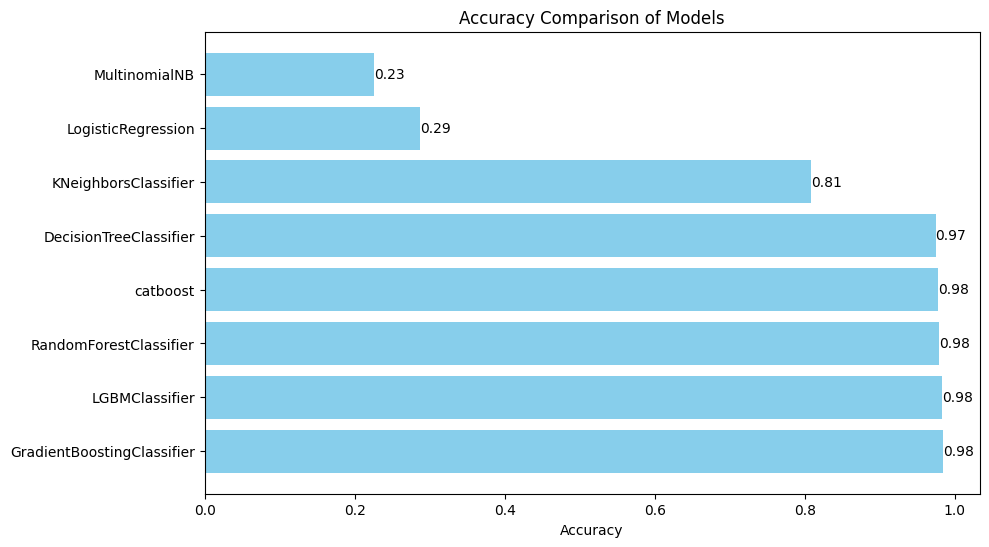

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Your accuracy dictionary
accuracy_dict = {
    'LogisticRegression': 0.28674832962138086,
    'DecisionTreeClassifier': 0.9743875278396437,
    'RandomForestClassifier': 0.9793986636971047,
    'KNeighborsClassifier': 0.8084632516703786,
    'MultinomialNB': 0.2255011135857461,
    'GradientBoostingClassifier': 0.9838530066815144,
    'LGBMClassifier': 0.982739420935412,
    'catboost': 0.9771714922048997
}

df = pd.DataFrame(list(accuracy_dict.items()), columns=['Model', 'Accuracy'])
df = df.sort_values(by='Accuracy', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(df['Model'], df['Accuracy'], color='skyblue')

for index, value in enumerate(df['Accuracy']):
    plt.text(value, index, f'{value:.2f}', ha='left', va='center', color='black', fontsize=10)

plt.xlabel('Accuracy')
plt.title('Accuracy Comparison of Models')
plt.show()

In [ ]:
# Mixed roc
# Heatmap for evalution matrics for 3-4 models
# confusion matrix
